In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('zomato_1.csv')
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari


In [3]:
df.shape

(51042, 11)

In [3]:
type_to_type_of_rest = {
    'Buffet': 'Casual Dining',
    'Cafes': 'Casual Dining',
    'Dine-out': 'Casual Dining',
    'Delivery': 'Quick Service',
    'Desserts': 'Quick Service',
    'Drinks & nightlife': 'Night Life',
    'Pubs and bars': 'Night Life'
}

# Map the 'listed_in(type)' values to 'type_of_rest'
df['type_of_rest'] = df['listed_in(type)'].map(type_to_type_of_rest)

In [4]:
north_bengaluru = ['Rajajinagar', 'New BEL Road', 'Malleshwaram', 'Kammanahalli', 'Kalyan Nagar', 'Indiranagar']
south_bengaluru = ['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Whitefield', 'Sarjapur Road', 'BTM', 'Electronic City', 'Marathahalli', 'Koramangala 4th Block', 'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'JP Nagar', 'Jayanagar', 'HSR', 'Brookefield']
central_bengaluru = ['Brigade Road', 'Residency Road', 'Church Street', 'Old Airport Road', 'MG Road', 'Lavelle Road', 'Frazer Town']

# Function to categorize locations
def categorize_location(row):
    if row['listed_in(city)'] in north_bengaluru:
        return 'north_bengaluru'
    elif row['listed_in(city)'] in south_bengaluru:
        return 'south_bengaluru'
    elif row['listed_in(city)'] in central_bengaluru:
        return 'central_bengaluru'
    else:
        return 'other'  # Add this line if you want to handle other cases

# Apply the function to create a new column
df['location_type'] = df.apply(categorize_location, axis=1)

In [5]:
# Define the columns to drop
columns_to_drop = ['name', 'listed_in(type)', 'listed_in(city)', 'cuisines','location','rest_type']

# Drop the specified columns in-place
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [6]:
# Define the columns to change to 'category' data type
columns_to_change = ['online_order', 'book_table', 'location_type', 'type_of_rest']

# Convert the specified columns to 'category' data type
df[columns_to_change] = df[columns_to_change].astype('category')

In [8]:
Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in 'votes' column
df['votes'] = df['votes'].apply(lambda x: upper_bound if x > upper_bound else x)
df['votes'] = df['votes'].apply(lambda x: lower_bound if x < lower_bound else x)

In [7]:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers in 'votes' column
df['rate'] = df['rate'].apply(lambda x: upper_bound if x > upper_bound else x)
df['rate'] = df['rate'].apply(lambda x: lower_bound if x < lower_bound else x)

In [8]:
df.dtypes

online_order                   category
book_table                     category
rate                            float64
votes                             int64
approx_cost(for two people)     float64
type_of_rest                   category
location_type                  category
dtype: object

WCSS for different values of K: [153125.99999999919, 76490.56028197995, 57802.223651244974, 43608.95084032952, 36933.02173837836, 31902.477473163563, 27672.141593338118]


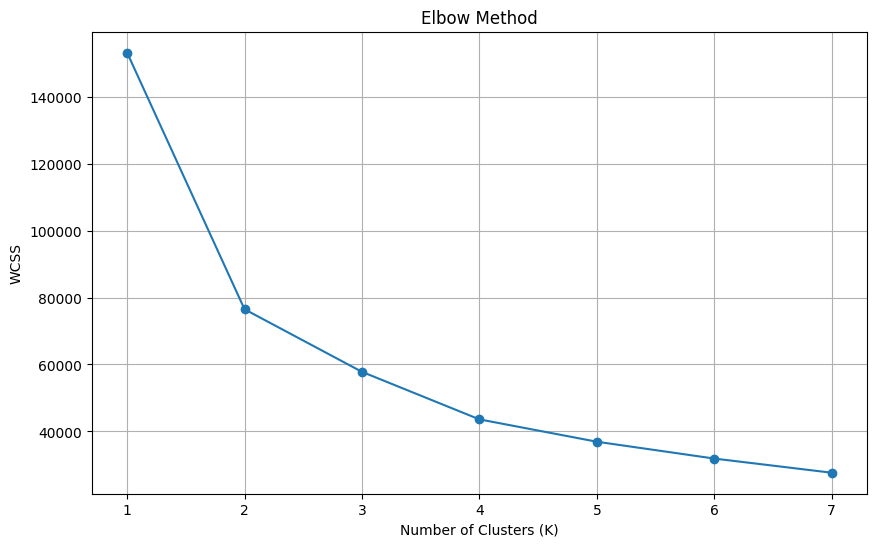

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Selecting relevant columns
selected_columns = ['rate', 'votes', 'approx_cost(for two people)']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_data)

# Consider the number of clusters (K) from 1 to 7
# Use a for loop to perform K-means with different values of K
wcss = []

for k in range(1, 8):
    # Fit K-means clustering with the number of clusters K
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    
    # Append the value of WCSS for each K to the list 'wcss'
    wcss.append(kmeans.inertia_)

# Print the Within-Cluster Sum of Squares (WCSS)
print("WCSS for different values of K:", wcss)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()

Silhouette score for 3 clusters: 0.4157929911765353
Silhouette score for 4 clusters: 0.4181805581897276
Silhouette score for 5 clusters: 0.39116476210516904


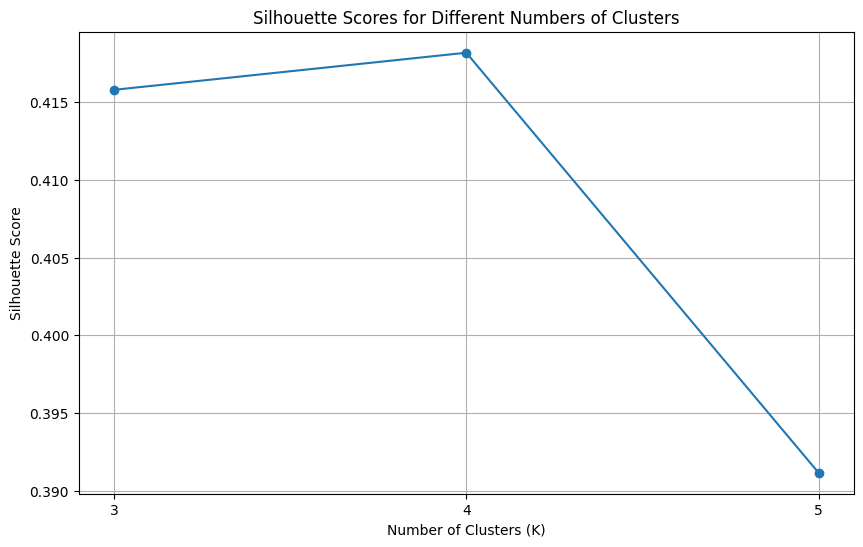

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Selecting relevant columns
selected_columns = ['rate', 'votes', 'approx_cost(for two people)']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_data)

# Consider the number of clusters (K) from 3 to 5
# Use a for loop to perform K-means with different values of K
silhouette_scores = []

for k in range(3, 6):
    # Fit K-means clustering with the number of clusters K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    
    # Calculate silhouette score for each K
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette score for {k} clusters:", score)

# Plot the Silhouette Scores graph
plt.figure(figsize=(10, 6))
plt.plot(range(3, 6), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(3, 6))
plt.grid(True)
plt.show()

For n_clusters = 2, the average silhouette score is: 0.5431416176012928


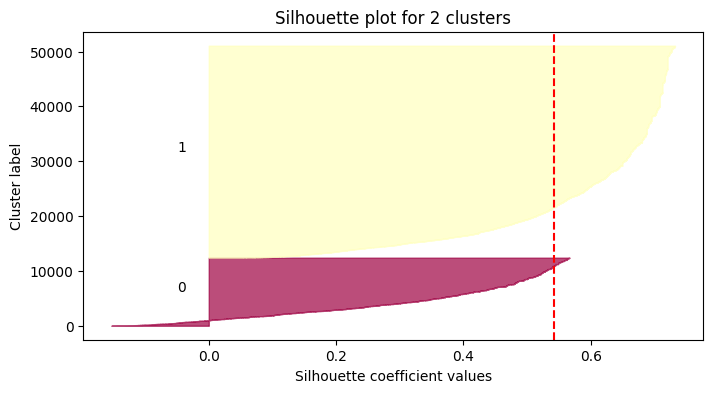

For n_clusters = 3, the average silhouette score is: 0.4157929911765353


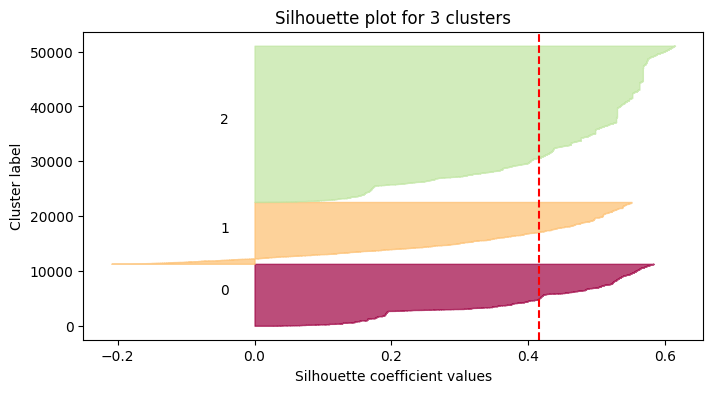

For n_clusters = 4, the average silhouette score is: 0.4181805581897276


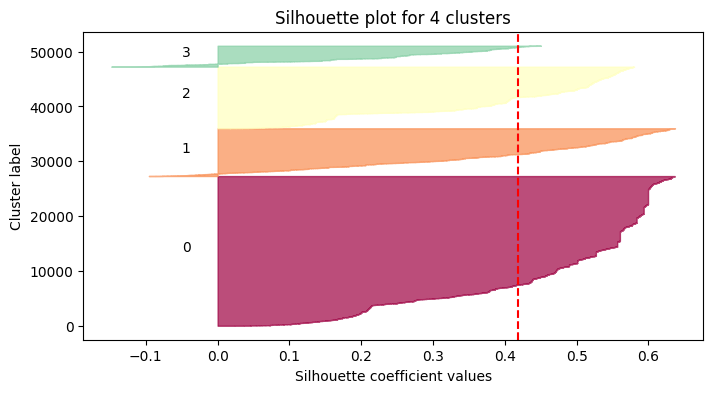

For n_clusters = 5, the average silhouette score is: 0.39116476210516904


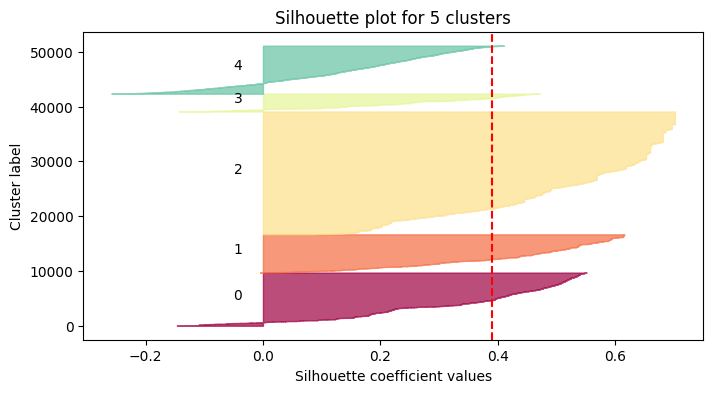

For n_clusters = 6, the average silhouette score is: 0.3921200383615154


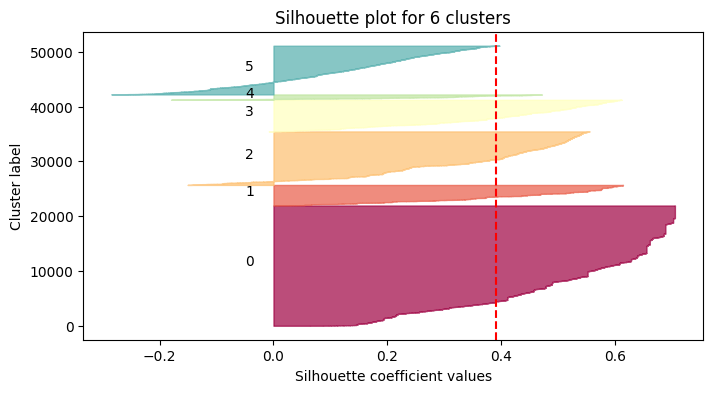

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Selecting relevant columns
selected_columns = ['rate', 'votes', 'approx_cost(for two people)']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_data)

# Consider the number of clusters (K) from 2 to 6
for k in range(2, 7):
    # Fit K-means clustering with the number of clusters K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    
    # Calculate silhouette score for each K
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    print(f"For n_clusters = {k}, the average silhouette score is:", silhouette_avg)
    
    # Calculate silhouette samples
    silhouette_values = silhouette_samples(scaled_features, kmeans.labels_)
    
    # Create a subplot with 1 row and 1 column
    plt.figure(figsize=(8, 4))
    
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.get_cmap("Spectral")(i / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    plt.title(f"Silhouette plot for {k} clusters")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

# K means clustering algorithm with an optimal number of clusters.

In [11]:
# Select relevant features for clustering
selected_features = df[["rate", "votes", "approx_cost(for two people)"]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Build K-means model with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original data
df["cluster"] = kmeans.labels_

# Print the number of data points in each cluster
print(df["cluster"].value_counts())

1    43227
0     7815
Name: cluster, dtype: int64


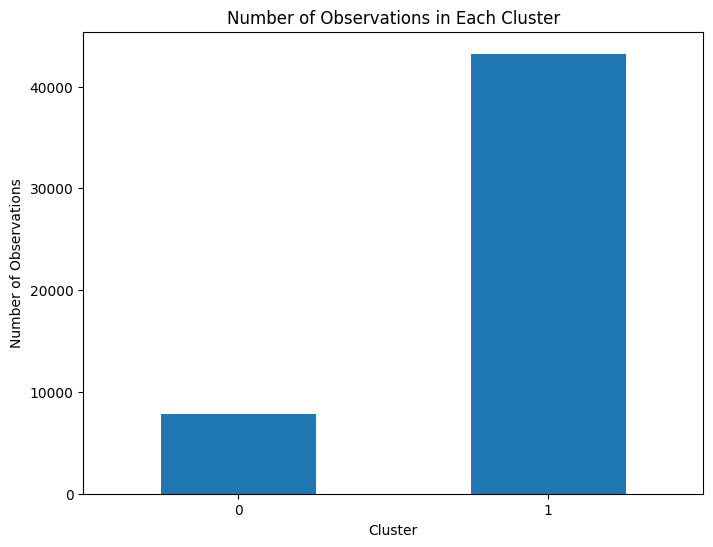

In [13]:
# Plot the number of observations in each cluster
plt.figure(figsize=(8, 6))
df["cluster"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Number of Observations")
plt.title("Number of Observations in Each Cluster")
plt.xticks(rotation=0)
plt.show()

# Observations belonging to the 1st cluster (cluster 0)

In [17]:
cluster_0_data = df[df["cluster"] == 0]
cluster_0_data

,online_order,book_table,rate,votes,approx_cost(for two people),type_of_rest,location_type,cluster
0,Yes,Yes,4.100000,775,800.0,Casual Dining,south_bengaluru,0
1,Yes,No,4.100000,787,800.0,Casual Dining,south_bengaluru,0
7,Yes,Yes,4.500000,2556,600.0,Casual Dining,south_bengaluru,0
37,Yes,No,4.200000,1647,600.0,Quick Service,south_bengaluru,0
38,Yes,No,4.400000,4884,750.0,Quick Service,south_bengaluru,0
...,...,...,...,...,...,...,...,...
51029,No,Yes,4.000000,189,1500.0,Night Life,south_bengaluru,0
51032,No,No,3.900000,77,2000.0,Night Life,south_bengaluru,0
51037,No,No,3.600000,27,1500.0,Night Life,south_bengaluru,0
51039,No,No,3.700449,0,2000.0,Night Life,south_bengaluru,0


In [16]:
cluster_0_data.describe()

,rate,votes,approx_cost(for two people),cluster
count,7815.000000,7815.000000,7815.000000,7815.0
mean,4.185611,1349.554958,1306.519514,0.0
std,0.227922,1660.275488,583.133633,0.0
min,3.000000,0.000000,100.000000,0.0
25%,4.000000,346.000000,900.000000,0.0
50%,4.200000,856.000000,1200.000000,0.0
75%,4.400000,1754.500000,1500.000000,0.0
max,4.500000,16832.000000,6000.000000,0.0


# Observations belonging to the 1st cluster (cluster 0)

In [18]:
cluster_1_data = df[df["cluster"] == 1]
cluster_1_data

,online_order,book_table,rate,votes,approx_cost(for two people),type_of_rest,location_type,cluster
2,Yes,No,3.800000,918,800.0,Casual Dining,south_bengaluru,1
3,No,No,3.700000,88,300.0,Casual Dining,south_bengaluru,1
4,No,No,3.800000,166,600.0,Casual Dining,south_bengaluru,1
5,Yes,No,3.800000,286,600.0,Casual Dining,south_bengaluru,1
6,No,No,3.600000,8,800.0,Casual Dining,south_bengaluru,1
...,...,...,...,...,...,...,...,...
51034,No,No,3.700000,34,800.0,Night Life,south_bengaluru,1
51035,No,No,3.700449,0,900.0,Night Life,south_bengaluru,1
51036,No,No,2.900000,81,800.0,Night Life,south_bengaluru,1
51038,No,No,3.700449,0,600.0,Night Life,south_bengaluru,1


In [19]:
cluster_1_data.describe()

,rate,votes,approx_cost(for two people),cluster
count,43227.000000,43227.000000,43227.000000,43227.0
mean,3.619617,91.958035,420.057487,1.0
std,0.324697,162.773806,214.661445,0.0
min,2.900000,0.000000,40.000000,1.0
25%,3.400000,4.000000,250.000000,1.0
50%,3.700449,26.000000,400.000000,1.0
75%,3.800000,104.000000,500.000000,1.0
max,4.500000,1884.000000,1900.000000,1.0


# Scatter plot with hue as cluster labels

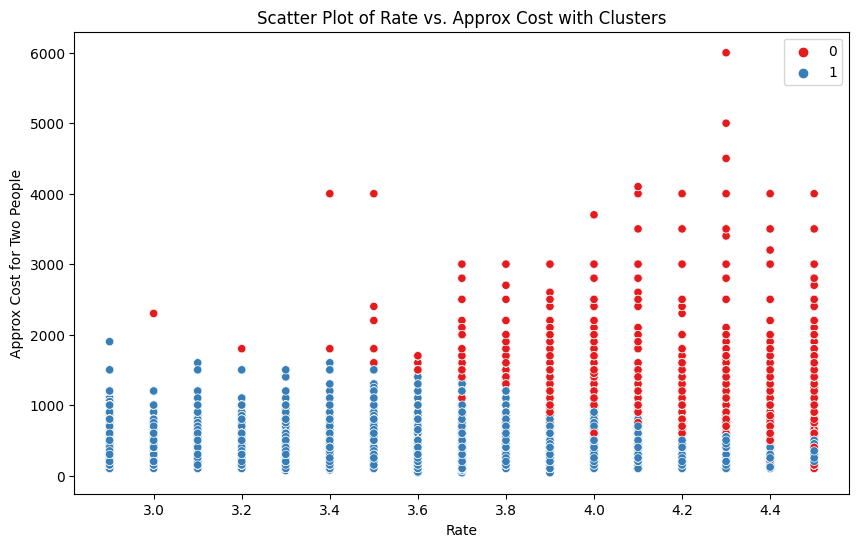

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="rate", y="approx_cost(for two people)", hue="cluster", palette="Set1")
plt.xlabel("Rate")
plt.ylabel("Approx Cost for Two People")
plt.title("Scatter Plot of Rate vs. Approx Cost with Clusters")
plt.legend()
plt.show()

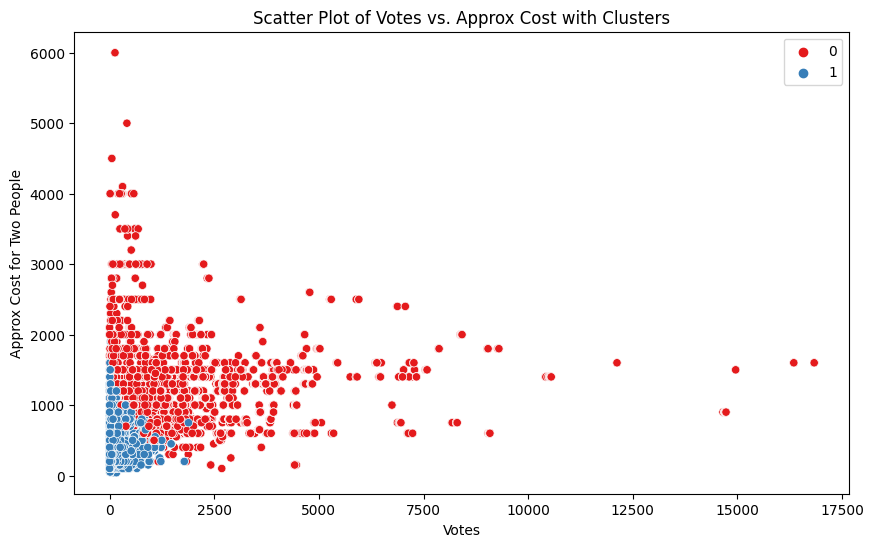

In [21]:
sns.scatterplot(data=df, x="votes", y="approx_cost(for two people)", hue="cluster", palette="Set1")
plt.xlabel("Votes")
plt.ylabel("Approx Cost for Two People")
plt.title("Scatter Plot of Votes vs. Approx Cost with Clusters")
plt.legend()
plt.show()

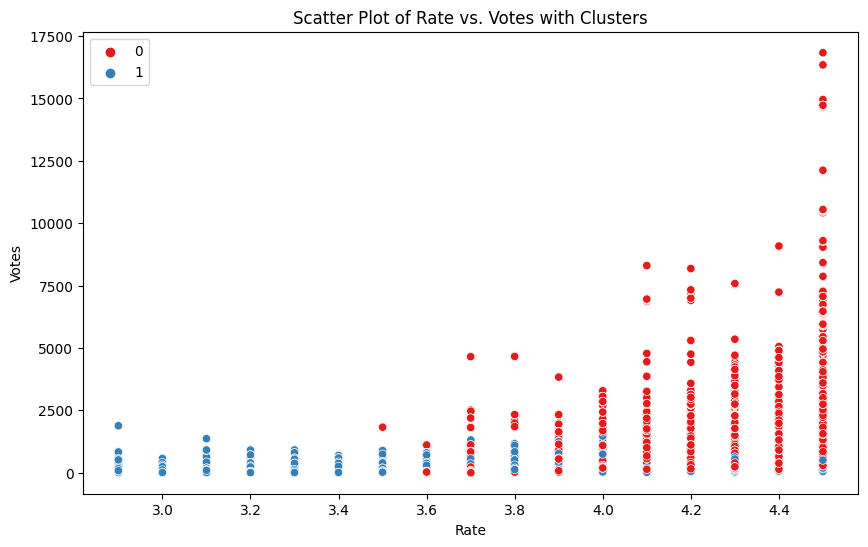

In [22]:
sns.scatterplot(data=df, x="rate", y="votes", hue="cluster", palette="Set1")
plt.xlabel("Rate")
plt.ylabel("Votes")
plt.title("Scatter Plot of Rate vs. Votes with Clusters")
plt.legend()
plt.show()


Cluster 0 comprises 7,815 observations and is characterized by restaurants with relatively high ratings, higher votes, and higher costs for two people. These establishments seem to offer a more upscale dining experience.

Cluster 1 consists of 43,227 observations and is primarily composed of restaurants with varying ratings, but generally lower rates of both votes and cost for two people. These restaurants appear to offer more affordable options with a wider range of ratings.

In summary, Cluster 0 represents higher-end restaurants with impressive ratings, while Cluster 1 encompasses a larger group of establishments that provide diverse dining experiences, often at lower costs.